## HDFC Churn Analysis

## Libary Import

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Import 

In [10]:
df_customer_data = pd.read_csv(r"E:\JAYANT\Python\Churn_data.csv")

In [11]:
df_churn_data = pd.read_csv(r"E:\JAYANT\Python\Customer_Data.csv")

In [12]:
df_internet_data = pd.read_csv(r"E:\JAYANT\Python\internet data.csv")

In [13]:
# Display basic information about each dataset
df_customer_data.info(), df_customer_data.head(), df_churn_data.info(), df_churn_data.head(), df_internet_data.info(), df_internet_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   Churn             7043 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 495.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null 

(None,
    customerID  tenure PhoneService        Contract PaperlessBilling  \
 0  7590-VHVEG       1           No  Month-to-month              Yes   
 1  5575-GNVDE      34          Yes        One year               No   
 2  3668-QPYBK       2          Yes  Month-to-month              Yes   
 3  7795-CFOCW      45           No        One year               No   
 4  9237-HQITU       2          Yes  Month-to-month              Yes   
 
                PaymentMethod  MonthlyCharges  TotalCharges Churn  
 0           Electronic check           29.85         29.85    No  
 1               Mailed check           56.95       1889.50    No  
 2               Mailed check           53.85        108.15   Yes  
 3  Bank transfer (automatic)           42.30       1840.75    No  
 4           Electronic check           70.70        151.65   Yes  ,
 None,
    customerID  gender SeniorCitizen Partner Dependents  Day  year  month  \
 0  7590-VHVEG  Female            No     Yes         No   29  1998

In [16]:
#Marge Customer and Churn Data
df_first_marge = pd.merge(df_customer_data,df_churn_data ,on='customerID', how='inner')

In [17]:
# Merge the Internet Data with the First Merged Dataset
Churn_Analysis_Dataset = pd.merge(df_first_marge,df_internet_data ,on='customerID', how='inner')

In [18]:
# Display basic information about each marge dataset
Churn_Analysis_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   object 
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  Day               7043 non-null   int64  
 14  year              7043 non-null   int64  
 15  month             7043 non-null   int64  
 16  DOB               7043 non-null   object 


In [19]:
# Display hader about each marge dataset
Churn_Analysis_Dataset.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,DOB,AGE,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,1/29/1998,27,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,...,9/12/1983,41,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,5/15/1996,28,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,2/19/2001,24,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,12/23/1980,44,No,Fiber optic,No,No,No,No,No,No


In [20]:
# Display shape about each marge dataset
Churn_Analysis_Dataset.shape

(7043, 26)

In [21]:
#show null value
Churn_Analysis_Dataset.isnull().sum()

customerID             0
tenure                 0
PhoneService           0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
Churn                  0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
Day                    0
year                   0
month                  0
DOB                    0
AGE                    0
MultipleLines          0
InternetService        0
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
dtype: int64

In [22]:
#replace null value in the specified columns
Churn_Analysis_Dataset['TotalCharges'] = Churn_Analysis_Dataset['TotalCharges'].fillna(0)


In [23]:
replace_values = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Replace NaN values in the specified columns
Churn_Analysis_Dataset[replace_values] = Churn_Analysis_Dataset[replace_values].fillna('N/A') 

In [24]:
# show null value
Churn_Analysis_Dataset.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Day                 0
year                0
month               0
DOB                 0
AGE                 0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [25]:
#show Duplicated value
Churn_Analysis_Dataset.duplicated(['customerID']).sum()

np.int64(0)

In [26]:
#show all table Duplicated value
Churn_Analysis_Dataset.duplicated().sum()

np.int64(0)

In [27]:
#Replace Churn column value
Churn_Analysis_Dataset['Churn'] = Churn_Analysis_Dataset['Churn'] .replace({'Yes': 1, 'No': 0}) .astype('int')

In [28]:
#Show All data
Churn_Analysis_Dataset.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,DOB,AGE,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,...,1/29/1998,27,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,0,Male,...,9/12/1983,41,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,...,5/15/1996,28,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,...,2/19/2001,24,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,...,12/23/1980,44,No,Fiber optic,No,No,No,No,No,No


## EDA

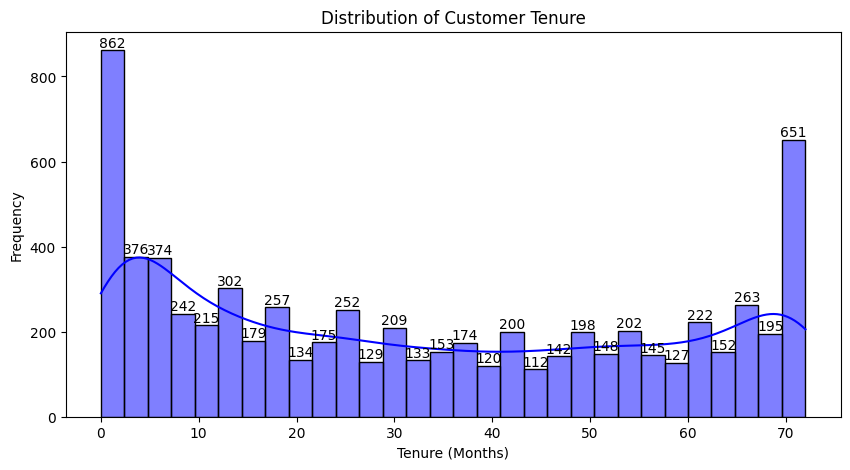

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [29]:
#Plot the distribution of customer tenure
plt.figure(figsize=(10, 5))
ax=sns.histplot(Churn_Analysis_Dataset['tenure'], bins=30, kde=True, color='blue')
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Distribution of Customer Tenure")
plt.show()
# Display basic statistics
Churn_Analysis_Dataset['tenure'].describe()

**The customer tenure distribution is right-skewed, with a mean of 32.37 months, a median of 29 months, and a range from 0 to 72 months, indicating a mix of short-term and long-term customers**

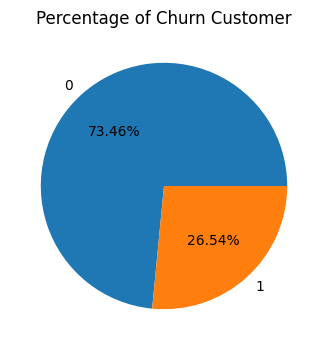

,Churn
Churn,
0,5174
1,1869


In [30]:
# Pie chart for churn proportion
plt.figure(figsize = (4,4))
gf=Churn_Analysis_Dataset.groupby("Churn").agg({"Churn":"count"})
plt.pie(gf["Churn"],labels=gf.index,autopct = "%1.2f%%")
plt.title("Percentage of Churn Customer")
plt.show()
gf

**Here is a pie chart showing the proportion of customers who have churned: 26.54% churned (in salmon color), and 73.46% remained (in light blue). Let me know if you need any modifications**

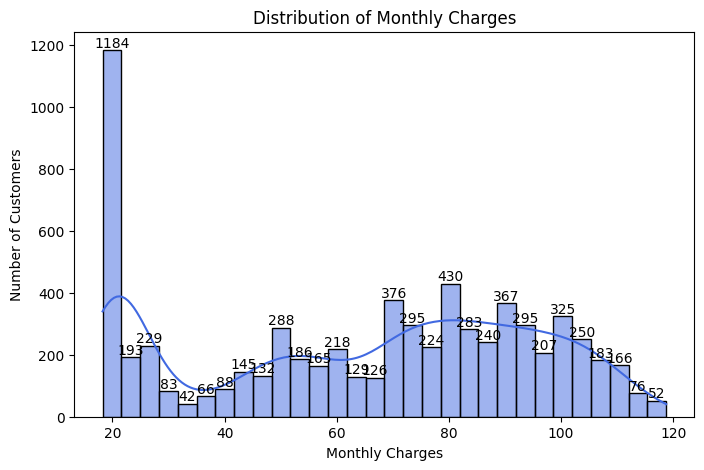

In [31]:
#Distribution of MonthlyCharges
plt.figure(figsize=(8, 5))
ax=sns.histplot(Churn_Analysis_Dataset["MonthlyCharges"], bins=30, kde=True, color="royalblue")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Distribution of Monthly Charges")
plt.show()

**Most customers are charged between RS.20 and RS.100 per month.**

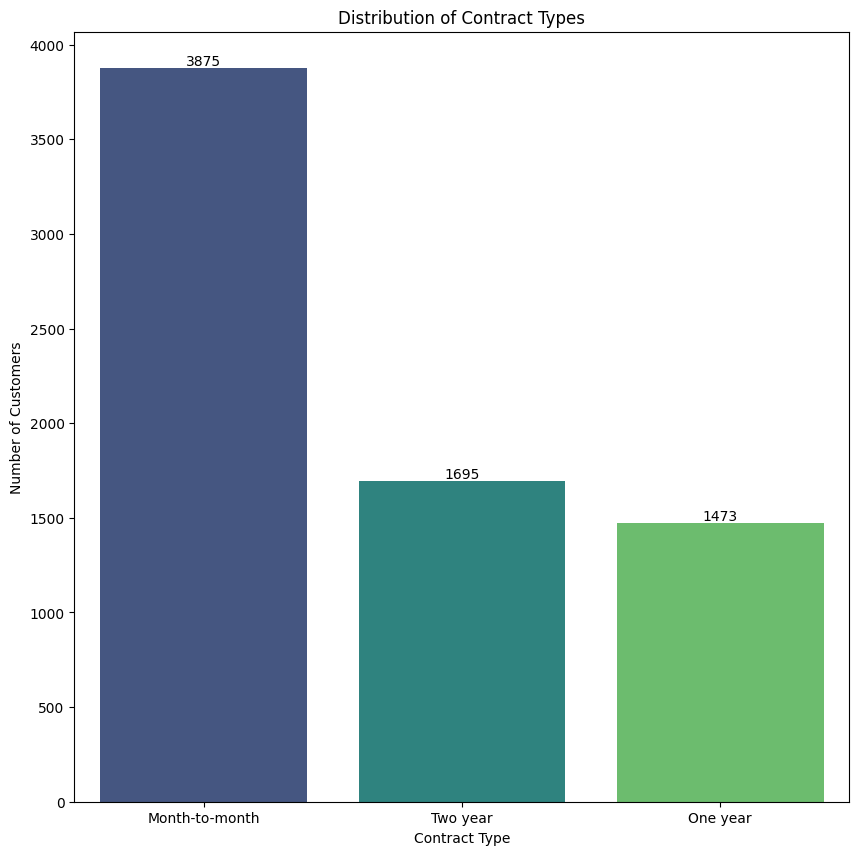

In [32]:
# Count contract types
contract_counts = Churn_Analysis_Dataset["Contract"].value_counts()
# Bar chart for contract types without warning
plt.figure(figsize=(10, 10))
ax=sns.barplot(x=contract_counts.index, y=contract_counts.values, hue=contract_counts.index, palette="viridis", legend=False)
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Distribution of Contract Types")


plt.show()


**Here is a bar chart showing which Contract Types are most usable by customers: 1473 one year( in Green),1693 two years (in Sky), and  3875 month-to-month (in blue). Month-to-month is the most useable Contract.**

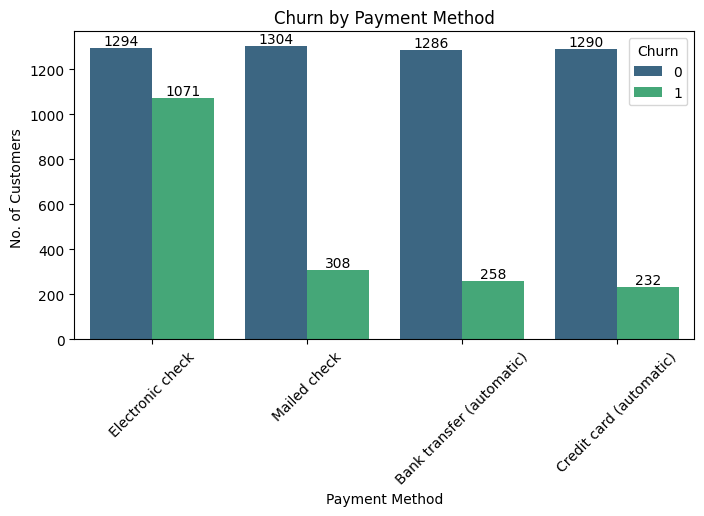

In [36]:
# Churn by Payment Method
plt.figure(figsize=(8,4))
ax=sns.countplot(x='PaymentMethod', hue='Churn', data=Churn_Analysis_Dataset, palette="viridis")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('No. of Customers ')
plt.xticks(rotation=45)
plt.show()

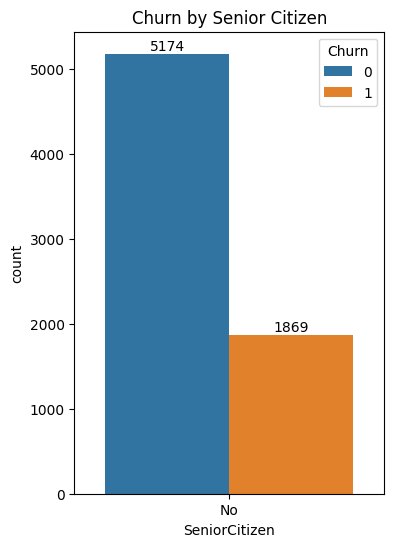

In [23]:
#Churn by SeniorCitizen by
plt.figure(figsize =(4,6))
ax =sns.countplot(x ="SeniorCitizen",data = Churn_Analysis_Dataset, hue="Churn")

for bars in ax.containers:
    ax.bar_label(bars)
plt.title ("Churn by Senior Citizen")
plt.show()

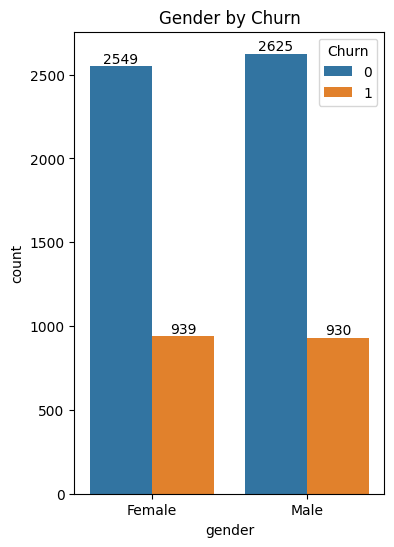

In [25]:
#Gender by Churn
plt.figure(figsize =(4,6))
ax =sns.countplot(x ="gender",data = Churn_Analysis_Dataset,hue = "Churn")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title ("Gender by Churn")
plt.show()

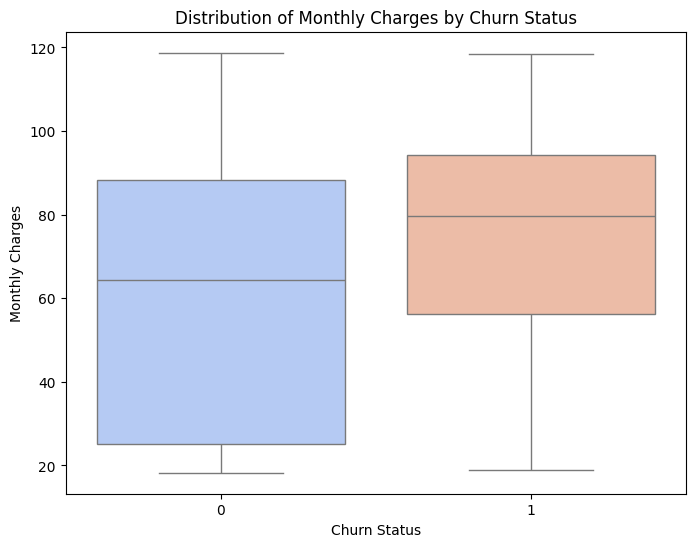

In [26]:
#Box plot comparing MonthlyCharges for churned vs. non-churned customers
plt.figure(figsize=(8, 6))
ax=sns.boxplot(x="Churn", y="MonthlyCharges", hue="Churn", data=Churn_Analysis_Dataset, palette="coolwarm", dodge=False)
plt.xlabel("Churn Status")
plt.ylabel("Monthly Charges")
plt.title("Distribution of Monthly Charges by Churn Status")
plt.legend([],[], frameon=False)  
plt.show()

**Churned customers tend to have higher MonthlyCharges on average compared to non-churned customers. This suggests that higher costs may be a contributing factor to customer churn**

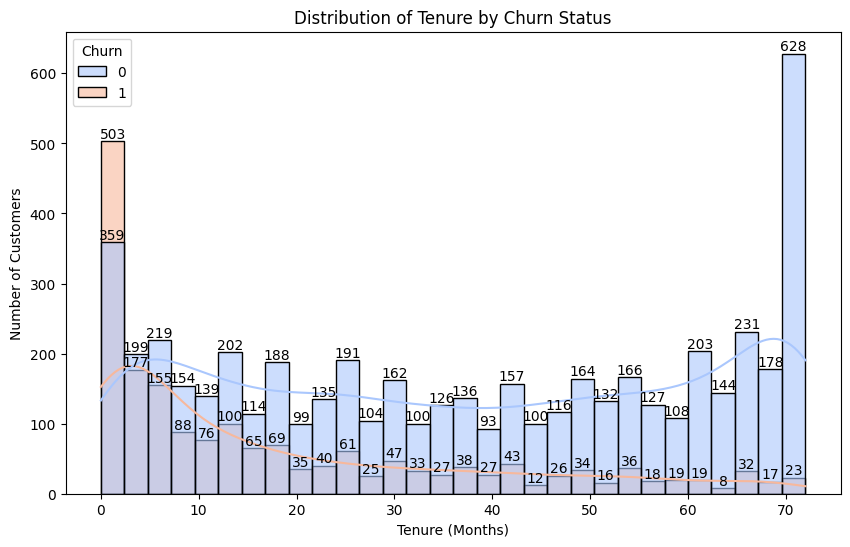

In [27]:
#Distribution of Tenure by Churn Status
plt.figure(figsize=(10, 6))
ax=sns.histplot(data=Churn_Analysis_Dataset, x="tenure", hue="Churn", kde=True, bins=30, palette="coolwarm", alpha=0.6)
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Distribution of Tenure by Churn Status")
plt.show()

**a.Average tenure is lower for churned customers.**


**b.The histogram gives a fine-grained distribution, whereas the box plot provides a simple overview of the range and median.**

**c.Longer tenure of non-churned customers shows that long-term customers are more likely to be retained.**


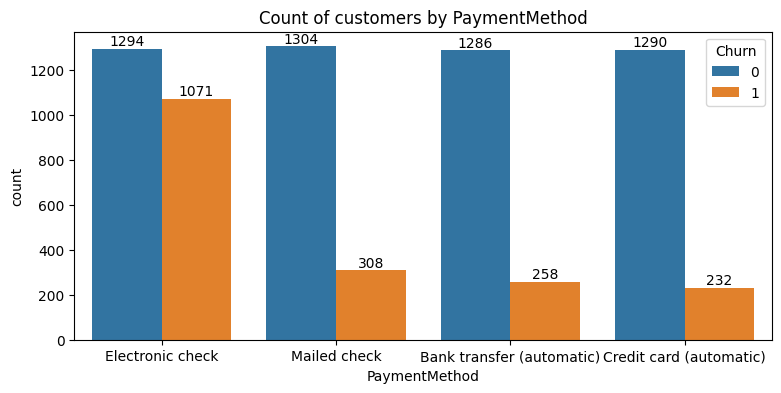

In [28]:
#customers by PaymentMethod
plt.figure(figsize = (9,4))
ax=sns.countplot(x = "PaymentMethod" , data = Churn_Analysis_Dataset, hue="Churn")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Count of customers by PaymentMethod")
plt.show()

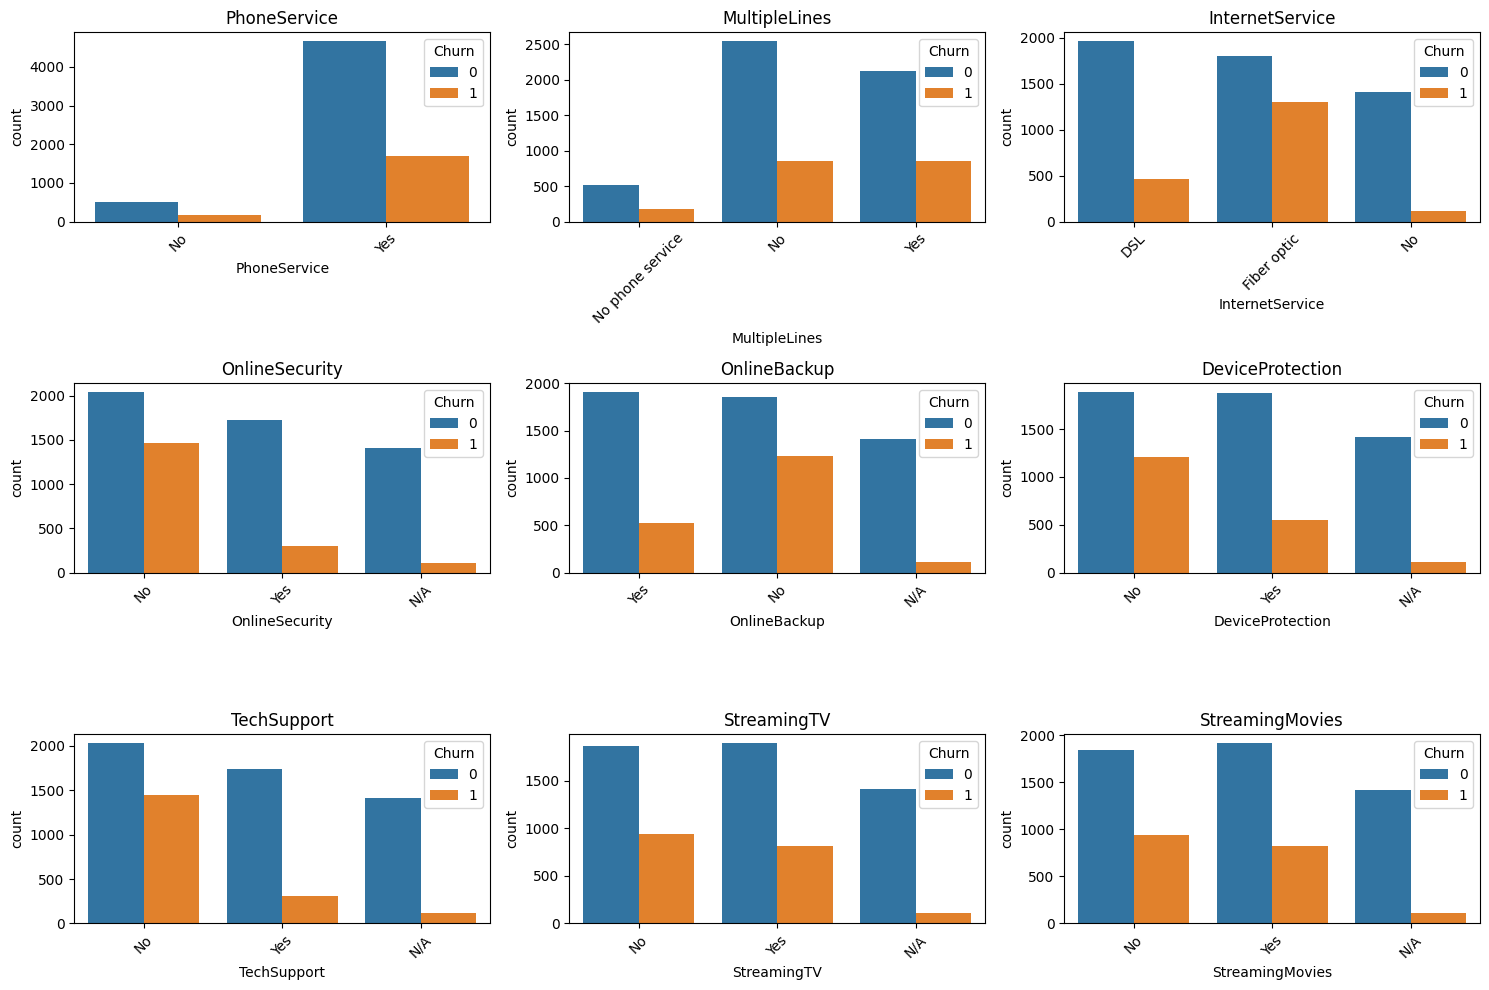

In [29]:
# Assuming your data is in a pandas DataFrame named 'df'
cols = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

# Create subplots with 3 rows and 3 columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create countplots for each column
for i, col in enumerate(cols):
    sns.countplot(data=Churn_Analysis_Dataset, x=col, ax=axes[i], hue = "Churn")
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45) 

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

**The countplots reveal that the majority of customers have phone service and internet service, with DSL being the most common type. A significant portion of customers do not subscribe to online security, online backup, device protection, or tech support. Streaming TV and movies are popular services among customers with internet service.**

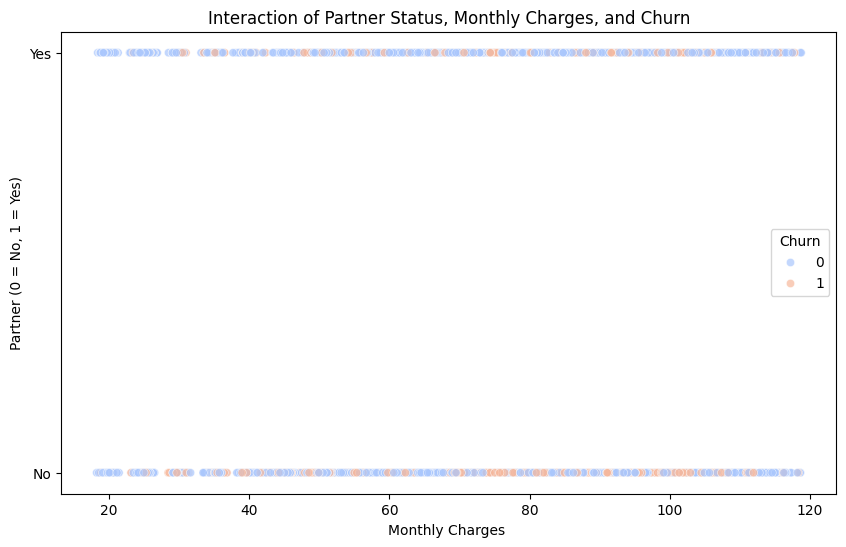

In [30]:
# Scatter plot for SeniorCitizen vs MonthlyCharges colored by Churn
plt.figure(figsize=(10, 6))
ax=sns. scatterplot( data=Churn_Analysis_Dataset, x="MonthlyCharges", y="Partner", hue="Churn", palette="coolwarm", alpha=0.7)
plt.xlabel("Monthly Charges ")
plt.ylabel("Partner (0 = No, 1 = Yes)")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Interaction of Partner Status, Monthly Charges, and Churn")
plt.legend(title="Churn")
plt.show()

**Greater MonthlyCharges correlate with greater churn.**

**Elderly customers could have a modestly greater churn rate, yet MonthlyCharges appear to be the major influencer.**

**The concentration of churned customers at high MonthlyCharges indicates pricing issues.**

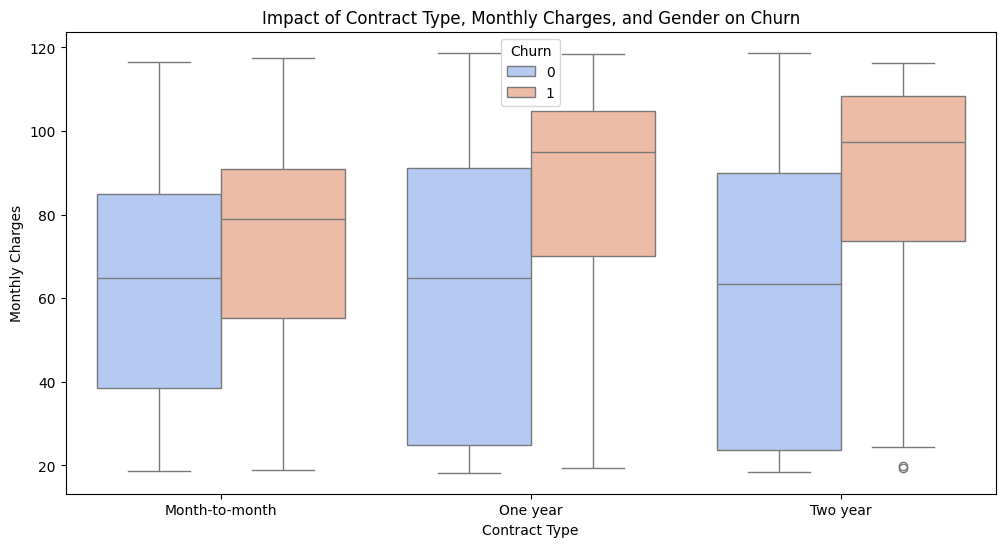

In [31]:
# Contract Type, Monthly Charges, and Gender on Churn
plt.figure(figsize=(12, 6))

# Create a box plot for MonthlyCharges by Contract type and Churn
ax = sns.boxplot(data=Churn_Analysis_Dataset,x="Contract",y="MonthlyCharges",hue="Churn",palette="coolwarm")
plt.xlabel("Contract Type")
plt.ylabel("Monthly Charges")
plt.title("Impact of Contract Type, Monthly Charges, and Gender on Churn")
plt.legend(title="Churn")
plt.show()

**Churn rates are high for both genders under month-to-month arrangements, especially at higher MonthlyCharges.**

**Long-term contracts reduce churn for both genders, indicating contract type is more important than gender.**

**Gender per se does not show a significant standalone effect on churn but might have nuanced variation in specific price buckets.**

# Conclusion

**Customers with month-to-month contracts, higher monthly charges, and fiber optic internet have the highest churn rate, highlighting cost sensitivity and service preferences as key churn factors.**